In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
%matplotlib inline

In [3]:
import pandas as pd

# Read the text file (assuming it is tab-delimited)
df = pd.read_csv('diabetes.csv')  
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


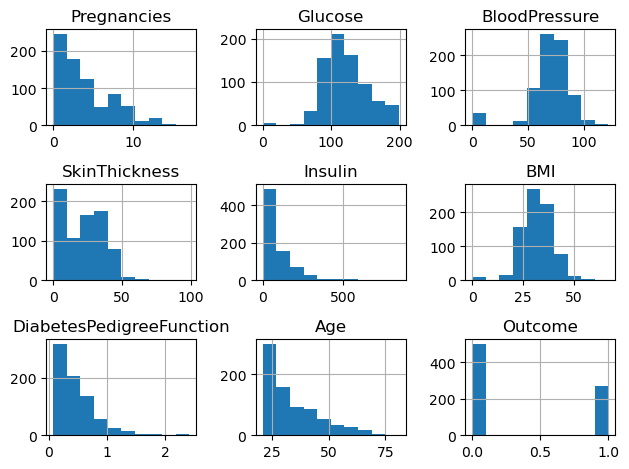

In [11]:
df.hist()
plt.tight_layout()
plt.show()

### Data preprocessing 

In [5]:
#Pre-processing
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [5]:
print("Number of rows with 0 values for each variable")
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [6]:
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

In [7]:
print("Number of rows with 0 values for each variable")
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [8]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [12]:
from sklearn import preprocessing

df_scaled = preprocessing.scale(df)

In [13]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [14]:
df_scaled['Outcome'] = df['Outcome']
df = df_scaled

In [15]:
df.describe().loc[['mean', 'std','max'],].round(2).abs()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.35
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.48
max,3.91,2.44,2.73,4.92,6.65,4.46,5.88,4.06,1.00


In [16]:
# Testing
# Imports

import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [17]:

X = df.iloc[:, 0:8].values
y = df.iloc[:, 8].values


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=10)

In [19]:
### Hyperparameter tuning ###


In [20]:
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#  Define the perceptron model
perceptron = Perceptron(random_state=1)

#  Define the grid of hyperparameters
param_grid = {
    'max_iter': [100, 600, 1200],
    'eta0': [0.01, 0.1, 1.0],
    'tol': [1e-3, 1e-4, 1e-5],
    'penalty': [None, 'l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=perceptron, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display the best parameters and results
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_ * 100:.3f}%")

# Show the detailed accuracy results for each hyperparameter combination
results = pd.DataFrame(grid_search.cv_results_)
results = results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

print("\nHyperparameter tuning results:")
print(results.sort_values('rank_test_score'))


Best Parameters: {'alpha': 0.01, 'eta0': 0.01, 'max_iter': 100, 'penalty': 'l1', 'tol': 0.001}
Best Cross-Validation Accuracy: 73.620%

Hyperparameter tuning results:
                                                params  mean_test_score  \
234  {'alpha': 0.01, 'eta0': 0.01, 'max_iter': 600,...         0.736199   
222  {'alpha': 0.01, 'eta0': 0.01, 'max_iter': 100,...         0.736199   
246  {'alpha': 0.01, 'eta0': 0.01, 'max_iter': 1200...         0.736199   
107  {'alpha': 0.0001, 'eta0': 1.0, 'max_iter': 120...         0.734520   
95   {'alpha': 0.0001, 'eta0': 1.0, 'max_iter': 600...         0.734520   
..                                                 ...              ...   
282  {'alpha': 0.01, 'eta0': 0.1, 'max_iter': 1200,...         0.641823   
284  {'alpha': 0.01, 'eta0': 0.1, 'max_iter': 1200,...         0.641823   
238  {'alpha': 0.01, 'eta0': 0.01, 'max_iter': 600,...         0.626643   
226  {'alpha': 0.01, 'eta0': 0.01, 'max_iter': 100,...         0.626643   
250  {'a

### **Results Analysis** ###

In [21]:
#Testing accuracy
#Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\n Test Accuracy: {accuracy * 100:.3f}%")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


 Test Accuracy: 69.481%

Confusion Matrix:
 [[66 29]
 [18 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.69      0.74        95
           1       0.59      0.69      0.64        59

    accuracy                           0.69       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.71      0.69      0.70       154

